Generating 361201 rays...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


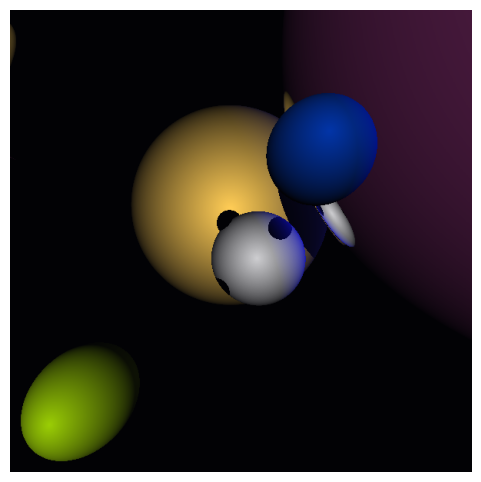

In [8]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vector import Vector, Angle
from object import Sphere
from ray import Ray, Intersection
from material import Material
from colour import Colour
from light import GlobalLight, PointLight

base_material = Material(reflective=False)
reflective_material = Material(reflective=True)
glass = Material(reflective=False, transparent=True, refractive_index=1.52)
emitive_material = Material(emitive=True)

default_material = base_material

sphere_1 = Sphere(
    id=1,
    centre=Vector(-0.8, 0.6, 0),
    radius=0.3,
    material=glass,
    colour=Colour(255, 100, 100)
)
sphere_2 = Sphere(
    id=2,
    centre=Vector(0.8, -0.8, -10),
    radius=2.2,
    material=default_material,
    colour=Colour(204, 204, 255)
)
sphere_3 = Sphere(
    id=3,
    centre=Vector(0.3, 0.34, 0.1),
    radius=0.2,
    material=default_material,
    colour=Colour(0, 51, 204)
)
sphere_4 = Sphere(
    id=4,
    centre=Vector(5.6, 3, -2),
    radius=5,
    material=reflective_material,
    colour=Colour(153, 51, 153)
)
sphere_5 = Sphere(
    id=5,
    centre=Vector(-0.8, -0.8, -0.2),
    radius=0.25,
    material=default_material,
    colour=Colour(153, 204, 0)
)
sphere_6 = Sphere(
    id=6,
    centre=Vector(-3, 10, -75),
    radius=30,
    material=default_material,
    colour=Colour(255, 204, 102)
)

spheres = [sphere_1, sphere_2, sphere_3, sphere_4, sphere_5, sphere_6]

ray_origin = Vector(0, 0, 1)

rays = []

RAY_COUNT = 100   # = rays in each axis = 2 * ray count + 1 (for centre ray)
RAY_STEP = 0.01   # 0.003 = long focal distance

multiple = 3     # 1 is normal, 2 is ok, 5 is good, 10 is mega
RAY_COUNT *= multiple
RAY_STEP /= multiple

X_RAYS = [r*RAY_STEP for r in range(-RAY_COUNT, 0, 1)] + [r*RAY_STEP for r in range(0, RAY_COUNT + 1)]
Y_RAYS = [r*RAY_STEP for r in range(RAY_COUNT, 0, -1)] + [-r*RAY_STEP for r in range(0, RAY_COUNT + 1)]
Z = -1

MAX_BOUNCES = 5

TOTAL_RAYS = len(X_RAYS) * len(Y_RAYS)

print(f"Generating {TOTAL_RAYS} rays...")
for Y in Y_RAYS:
    for X in X_RAYS:
        ray = Ray(
            origin=ray_origin,
            D=Vector(x=X, y=Y, z=-1)
        )
        rays.append(ray)

lightVector = Vector(3, 1, -0.75)     # infinite distance light source

global_light_sources = []
global_light_sources.append(GlobalLight(vector=Vector(3, 1, -0.75), colour=Colour(20, 20, 255), strength=1, max_angle=np.radians(90), func=0))

point_light_sources = []
sun = Sphere(id=0, centre=Vector(-0.6, 0.2, 6), radius=0.1, material=emitive_material, colour=Colour(255, 255, 204))
sun_light = PointLight(id=sun.id, position=sun.centre, colour=sun.colour, strength=1, max_angle=np.radians(90), func=-1)
spheres.append(sun)
point_light_sources.append(sun_light)

max_angle = np.radians(90)
background_colour = Colour(2, 2, 5)
black_colour = Colour(0, 0, 0)

pixels = []

progress_milestones = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for i, ray in enumerate(rays):

    progress = (i+1) / len(rays) * 100
    if progress > progress_milestones[0]:
        progress_milestones.pop(0)
        print(f"Casting Rays: {progress:.0f}%", end="\r")

    
    ray_terminal = ray.nearestSphereIntersect(spheres, max_bounces=MAX_BOUNCES)

    if ray_terminal == None:
        pixels.append(background_colour.getList())

    else:
        pixels.append(ray_terminal.terminalRGB(
            spheres=spheres,
            background_colour=background_colour,
            global_light_sources=global_light_sources,
            point_light_sources=point_light_sources
        ).getList())

X_SIZE = len(X_RAYS)
Y_SIZE = len(Y_RAYS)

pixels = np.array(pixels).reshape((X_SIZE, Y_SIZE, 3))

plt.figure(figsize=(6, 6))
plt.imshow(pixels)
plt.axis('off')
plt.savefig('render_output.png', bbox_inches='tight')
plt.show()